<a href="https://colab.research.google.com/github/JoshuaBarsky/Math-152/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import mpmath as mp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Comparing the primes to the Logarithmic Integral

First we recreate the is prime list from notebook 3.

In [ ]:
def isprimelist(n):
  flags = np.full(n,True) #creates a list of True
  flags[:2] = False #sets 0 and 1 to false
  p = 2
  while p <= np.sqrt(n): 
    if flags[p]: #If the number is prime then this formula sets all multiples of that number to be false
      flags[p*p::p] = [False] * len(flags[p*p::p]) 
    p += 1
  return flags

We then modify this function to count the amount of primes up to every value that is less than or equal to the input.

In [ ]:
def primesuptolist(n):
  flags = np.full(n,True)
  flags[:2] = False
  p = 2
  uptolist = np.zeros(n) #Initializing a list of zeros
  count = 0 #This will be our counter
  while p < n: #We sacrifice some of the efficiency of the original function, as our list needs the p value to count all the way up to our input to create the full list
    if flags[p] == True:
      flags[p*p::p] = [False] * len(flags[p*p::p])
      count += 1  #If flags[p] is True, The value p must be a prime number so we increase our count
      uptolist[p] = count #then the new count is added to the list
    else:
      uptolist[p] = count #if flags[p] is not a prime number, then the count is not increase, but the value is still added to our list
    p += 1
  return uptolist

In [ ]:
primesuptolist(1000000)

array([0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 7.8498e+04, 7.8498e+04,
       7.8498e+04])

Graph of the primes up to 1 million

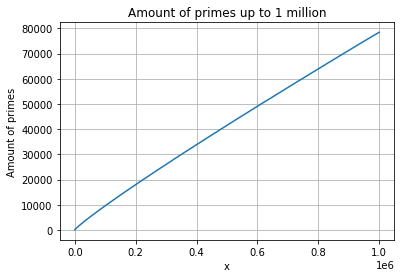

In [ ]:
xval = np.arange(0,1000000)
yval = primesuptolist(1000000)
plt.plot(xval,yval)
plt.title('Amount of primes up to 1 million')
plt.xlabel('x')
plt.ylabel('Amount of primes')
plt.grid(True)
plt.show()

One technique is to find the graph of the logarithmic integral, but the calculation would take much too long to calculate.

In [ ]:
#no longer needed - too long to calculate.
def Log_int_array(h):   #The li function from mpmath can't take an array as an input. We use this funtion to create array with the values given by the logarithmic integral function. 
      Values = np.zeros(h)
      for i in range(2,h):
       val = mp.li(i)
       Values[i] = val
      return Values


In [ ]:
%timeit Log_int_array(1000000)

1min 12s ± 544 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Another technique is to use the logarithmic sum $\sum_{n=2}^{x}\frac{1}{log(n)}$, which turns out to be a much faster implementation.

In [ ]:
#much faster to calculate
Larray = np.log(np.arange(2, 10**6+1))
ILarray = 1/Larray
y_arr = np.cumsum(ILarray) #Logarithmic sum

In [ ]:
#makes size of x == size of y.
x_arr = np.array(range(1000000-1))

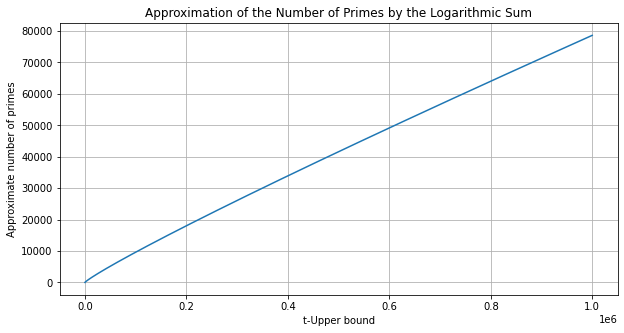

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x_arr, y_arr) 
plt.title('Approximation of the Number of Primes by the Logarithmic Sum')
plt.xlabel('t-Upper bound')
plt.ylabel('Approximate number of primes')
plt.grid(True)
plt.show()

This graph looks very close to the real number of primes up to 1 million! 

So much so, that to the naked eye you it's not obvious there is any difference!

Here is the graph of both the number of primes and approximation:

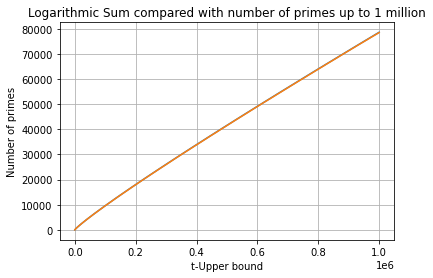

In [ ]:
plt.plot(x_arr, y_arr)
plt.plot(xval,yval)
plt.title('Logarithmic Sum compared with number of primes up to 1 million')
plt.xlabel('t-Upper bound')
plt.ylabel('Number of primes')
plt.grid(True)
plt.show()

At this scope the graphs perfectly overlay eachother, so we will calculate the error between the plots.

In [ ]:
#not a necessary function, but can be used for readibility!
def errorcalclist(x):
  return Log_int_array(x) - primesuptolist(x)  #will find the error for every x value up to 1 million

In [ ]:
errorcalc1mil = y_arr - (yval[:999999])

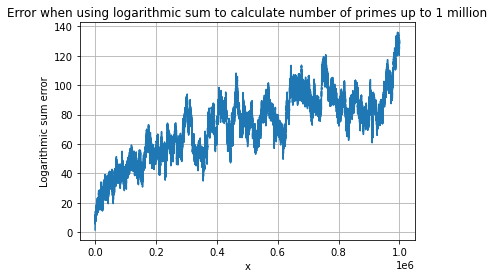

In [ ]:
plt.plot(x_arr,errorcalc1mil)
plt.title('Error when using logarithmic sum to calculate number of primes up to 1 million')
plt.xlabel('x')
plt.ylabel('Logarithmic sum error')
plt.grid(True)
plt.show()

As we see the logarithmic integral grows just slightly faster than the number of primes.

##**Prime Counting Function vs. Riemann Counting Function**

###$\pi(x)$ vs $R(x)$

The Prime Counting Function $\pi(x)$ is a function that is used to count the primes. This is a step graph where at each prime number on the x-axis the count goes up by 1 on the y-axis. 

The Riemann Prime Counting Function $R(x)$ is a function that closely resembles the output of $\pi(x)$, where $R(x) = \sum_{n=1}^{\infty}\frac{\mu(n)}{n}li(x^{1/n})$.
<br><br><br>
It's also important to note that the Riemann Prime Counting Function is *identical* to the Gramm series $G(x)$, which utilizes the zeta function $\zeta(z)$. Where $G(x) = 1 + \sum_{k=1}^{\infty}\frac{ln(x)^k}{k k ! \zeta(k+1)}$. This distinctly draws a connection between the prime numbers and complex values $\mathbb{C}$ using the Zeta function $\zeta(z)$.
<br><br><br>
The following link contains more information on these functions described above.

https://mathworld.wolfram.com/RiemannPrimeCountingFunction.html

The following page is a very descriptive page describing an approach of adding non trivial zeros of $\zeta(z)$ that seemed a bit complicated to code in this project, but was very interesting to learn about.

https://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/encoding1.htm

A cool demo of adding the non trivial zeros can be found at the link below.

https://demonstrations.wolfram.com/HowTheZerosOfTheZetaFunctionPredictTheDistributionOfPrimes/

Another interesting source is the following YouTube video.

https://www.youtube.com/watch?v=zlm1aajH6gY

**First we define $\mu(n)$:**

This is also called the Mobius function, but this is not the focus of this project. This is only an additional function we must define in order to have a functioning $R(x)$ function.

In [ ]:
def mu(n):
    if n == 1:
        return 1
    else:
        p = 0
        factors = fact(n) #returns an array of factors of n.
        for i in set(factors): #set() creates a set object, which is iterable.
            if factors.count(i) > 1: #count() counts the instances of an element in the list.
                return 0
            else:
                p = p + 1
        if p%2 == 0:
            return 1
        else:
            return -1

def fact(n): #factorizes a number n into its primes
    array = []
    i = 2
    while i**2 <= n: #same as while i <= sqrt(n)
        if n%i != 0: #if i is not a factor
            i = i + 1 #move on
        else:
            n = n//i #drops n by a factor of i
            array.append(i) #adds the factor i to the array
    if n>1: #if there is an additional factor of n, append it
        array.append(n)
    return array

**Now we define $R(x):$**

In [ ]:
def R(x):
  ans = 0
  for i in range(10):
    ans += (mu(i+1)/(i+1))*mp.li(x**(1/(i+1))) #R(x) sum that was described above.
  if np.isnan(float(ans)): #there is an instance of NaN where an exception must be made.
    return 0
  else:
    return (ans)

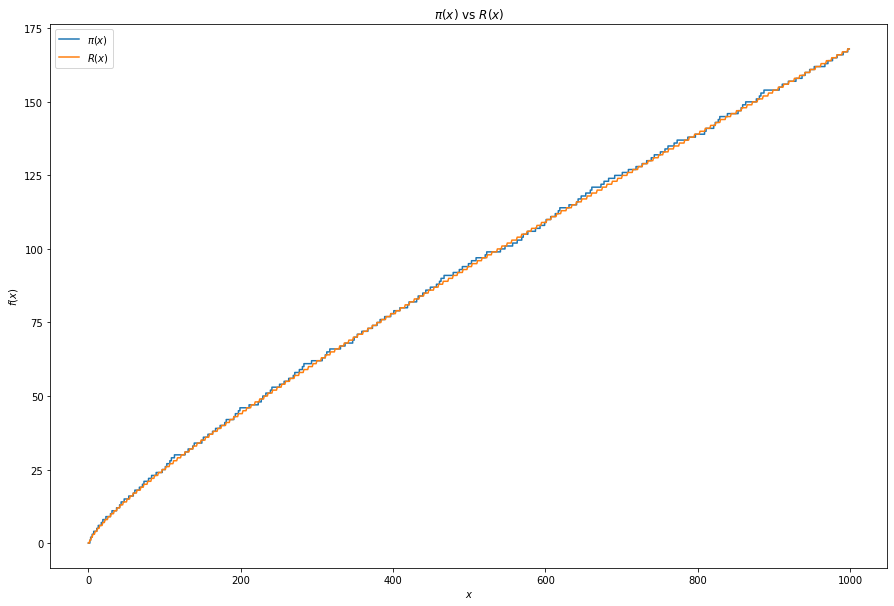

In [ ]:
size=1000 #sample size to use. This is a little slow to work with so be mindful of the size.
(x, y) = np.arange(size), primesuptolist(size)
(x2, y2) = np.arange(size), np.array([int(R(xi)) for xi in np.arange(size)])
plt.figure(figsize=(15,10))
plt.step(x, y, where='post', label = '$\pi(x)$')
plt.plot(x2, y2, label = '$R(x)$')
plt.title('$\pi(x)$ vs $R(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()


As we can see, $\pi(x)$ and $R(x)$ are very close!

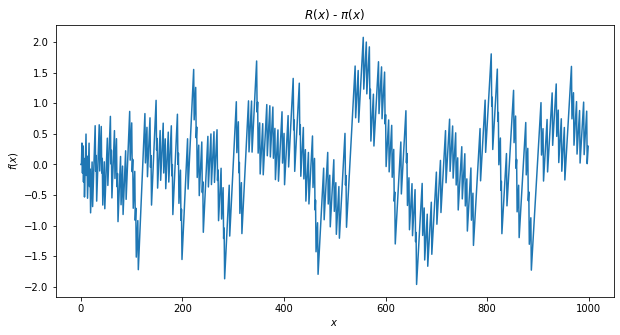

In [ ]:
size=1000 #sample size to use. This is a little slow to work with so be mindful of the size.
(x3, y3) = np.arange(size),  np.array([R(xi) for xi in np.arange(size)]) - primesuptolist(size)
plt.figure(figsize=(10,5))
plt.plot(x3, y3)
plt.title('$R(x)$ - $\pi(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

This is how close the two functions are. Wow!

# PIL IMAGE

For our PIL image we will try to compare the area under the logarithmic curve to the number of primes at a specific value (In this case we will be choosing 1500). To do this we basically create a graph of pixels. The Y axis represents the The number of primes at that specific X value.

To start we create a list of primes up to 1500, using our previous function. There are only 239 primes up to the value 1500, so to make the graph look a little more artistic we'll multiply each prime by a constant that will make our final image look more full.

In [ ]:
primeratio = primesuptolist(1500) * (1500 / max(primesuptolist(1500))) 
primeratio = primeratio.astype(int) #rounds each value to the nearest integer

In [ ]:
print(primesuptolist(1500))

[  0.   0.   1. ... 238. 238. 239.]


Next we create the function that will give our graph color. We also multiply this by constant that ensures maximum color density.

In [ ]:
def Log_int_array(h): 
      Values = np.zeros(h)
      for i in range(2,h):
       val = mp.li(i)
       Values[i] = val
      return Values

The above function is fast enough for a small number such as 1500.

In [ ]:
logintcolor = Log_int_array(1500) * (255 / max(Log_int_array(1500)))
logintcolor = logintcolor.astype(int)  

In [ ]:
max(Log_int_array(1500))

247.67556131010542

In [ ]:
np.shape(primeratio)

(1500,)

In [ ]:
np.shape(logintcolor)

(1500,)

Next we initialize a graph of zeros in 3-dimensions. That third dimension will be our RGB.

In [ ]:
pixels = np.zeros((1500,1500,3))   

In [ ]:
pixels[:,:,0] = 255  #These will set the RGB value of each pixel to be white
pixels[:,:,1] = 255
pixels[:,:,2] = 255

Now to create the Image. For every X value, this function takes the y value and colors everything below it to be more purple if the value of the logarithmic integral is smaller, and more blue if the value of the logrithmic integral is larger. It also adds a nice yellow background which complements the light color complex of the image.

In [ ]:
for x in range(1500): 
  pixels[x,:primeratio[x],0] = 255 - logintcolor[x]  #when the logarithmic integral is 0, The Red value of the pixel will be set to 255. When the integral is 255, the red value will be 0.
  pixels[x,:primeratio[x],1] = logintcolor[x]  #This basically does the opposite of the above but uses the green channel and gives the image a nice magenta to blue transition
  pixels[x,primeratio[x]:,2] = 124  #subtle yellow

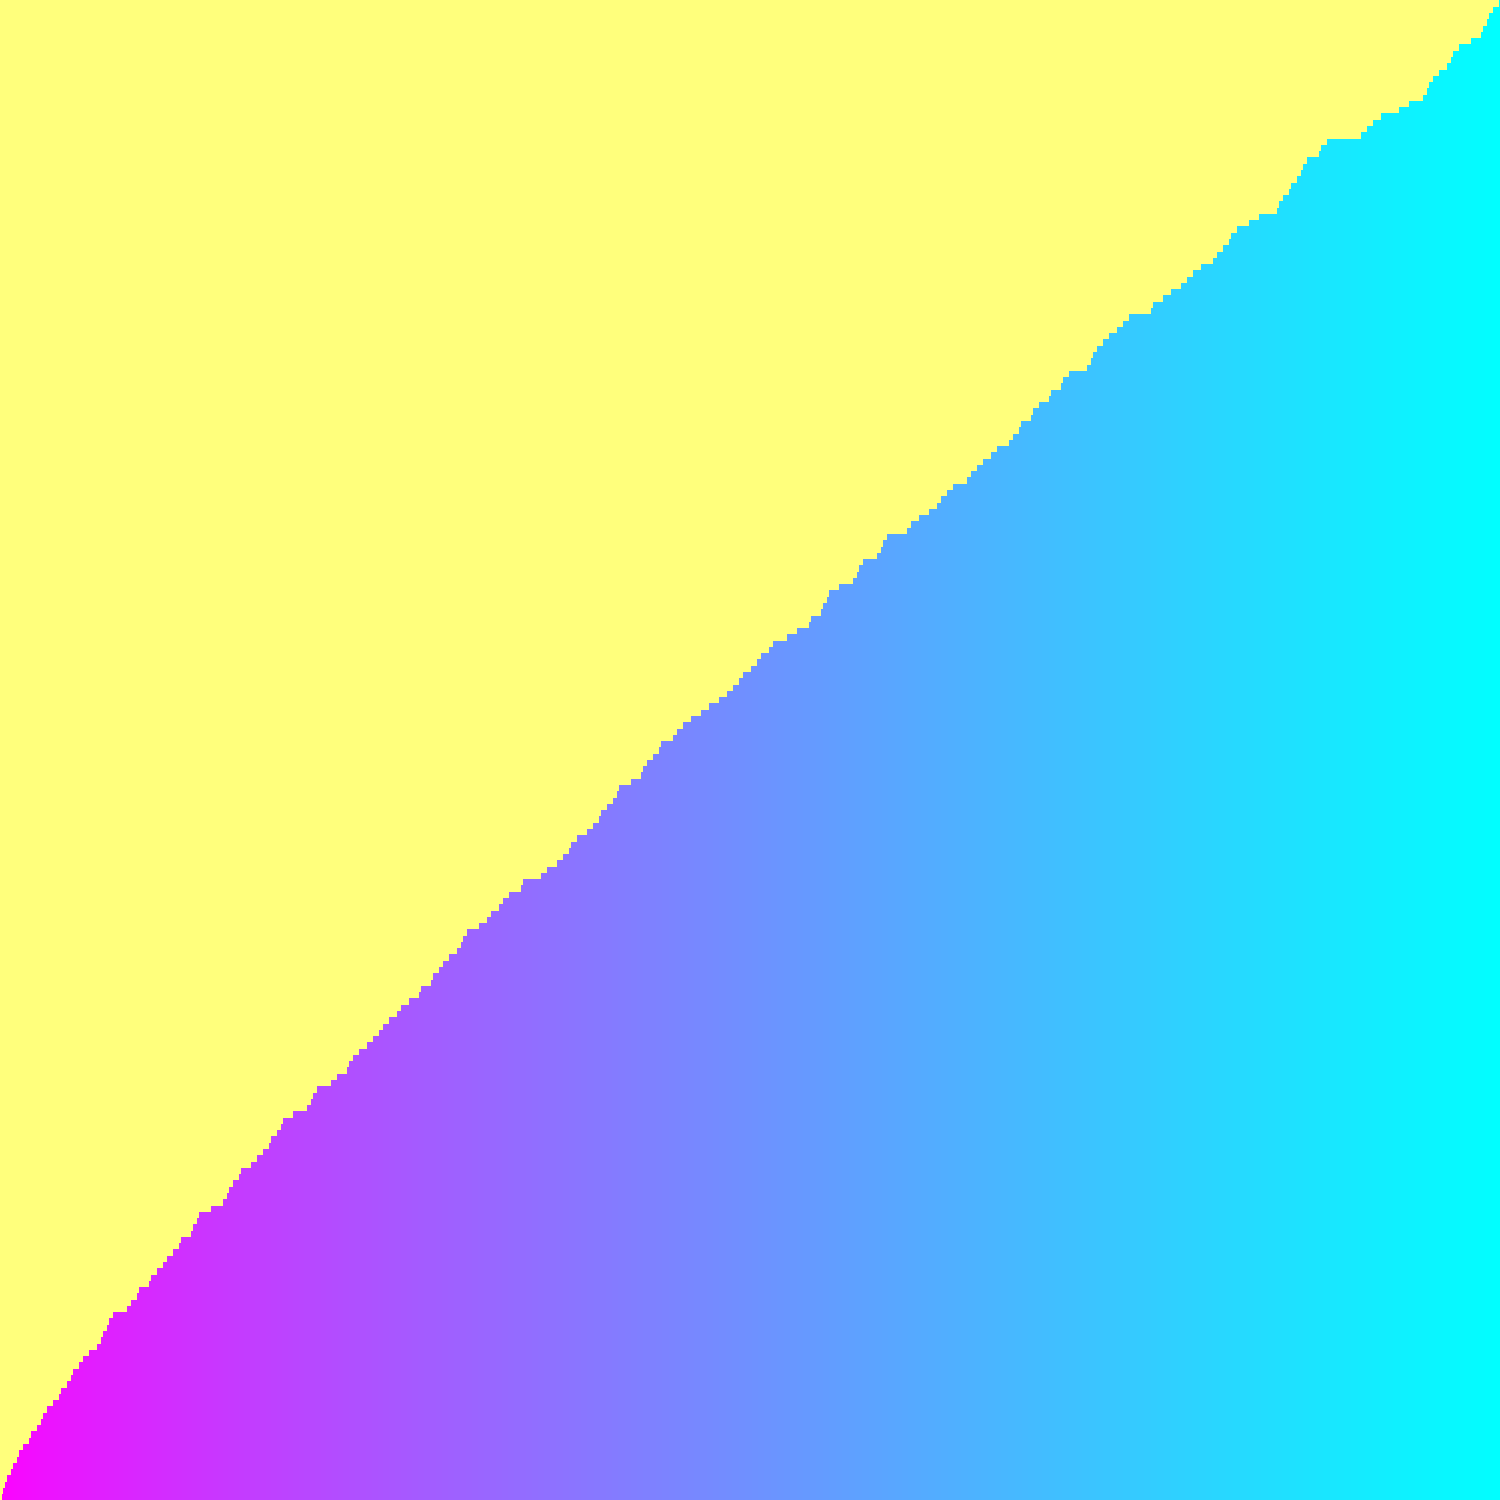

In [ ]:
img = Image.fromarray(pixels.astype(np.uint8))
img = img.rotate(90)  #we rotate the image because the x and y values in PIL are a little odd
display(img)

This visualisation with adjusted Y values actually allows us to accurately see the prime gaps. Every flat plane we see on the graph is a fairly large prime gap. If only it was easy to add number labels to the axes in PIL we could see where those prime gaps were.

Another color combination that is much spookier

In [ ]:
pixels = np.zeros((1500,1500,3))   

In [ ]:
for x in range(1500):
  pixels[x,:primeratio[x],[0,2]] = logintcolor[x]
  pixels[x,:primeratio[x],[0,1]] = 255 - logintcolor[x]
  pixels[x,:primeratio[x],[1,2]] = 256


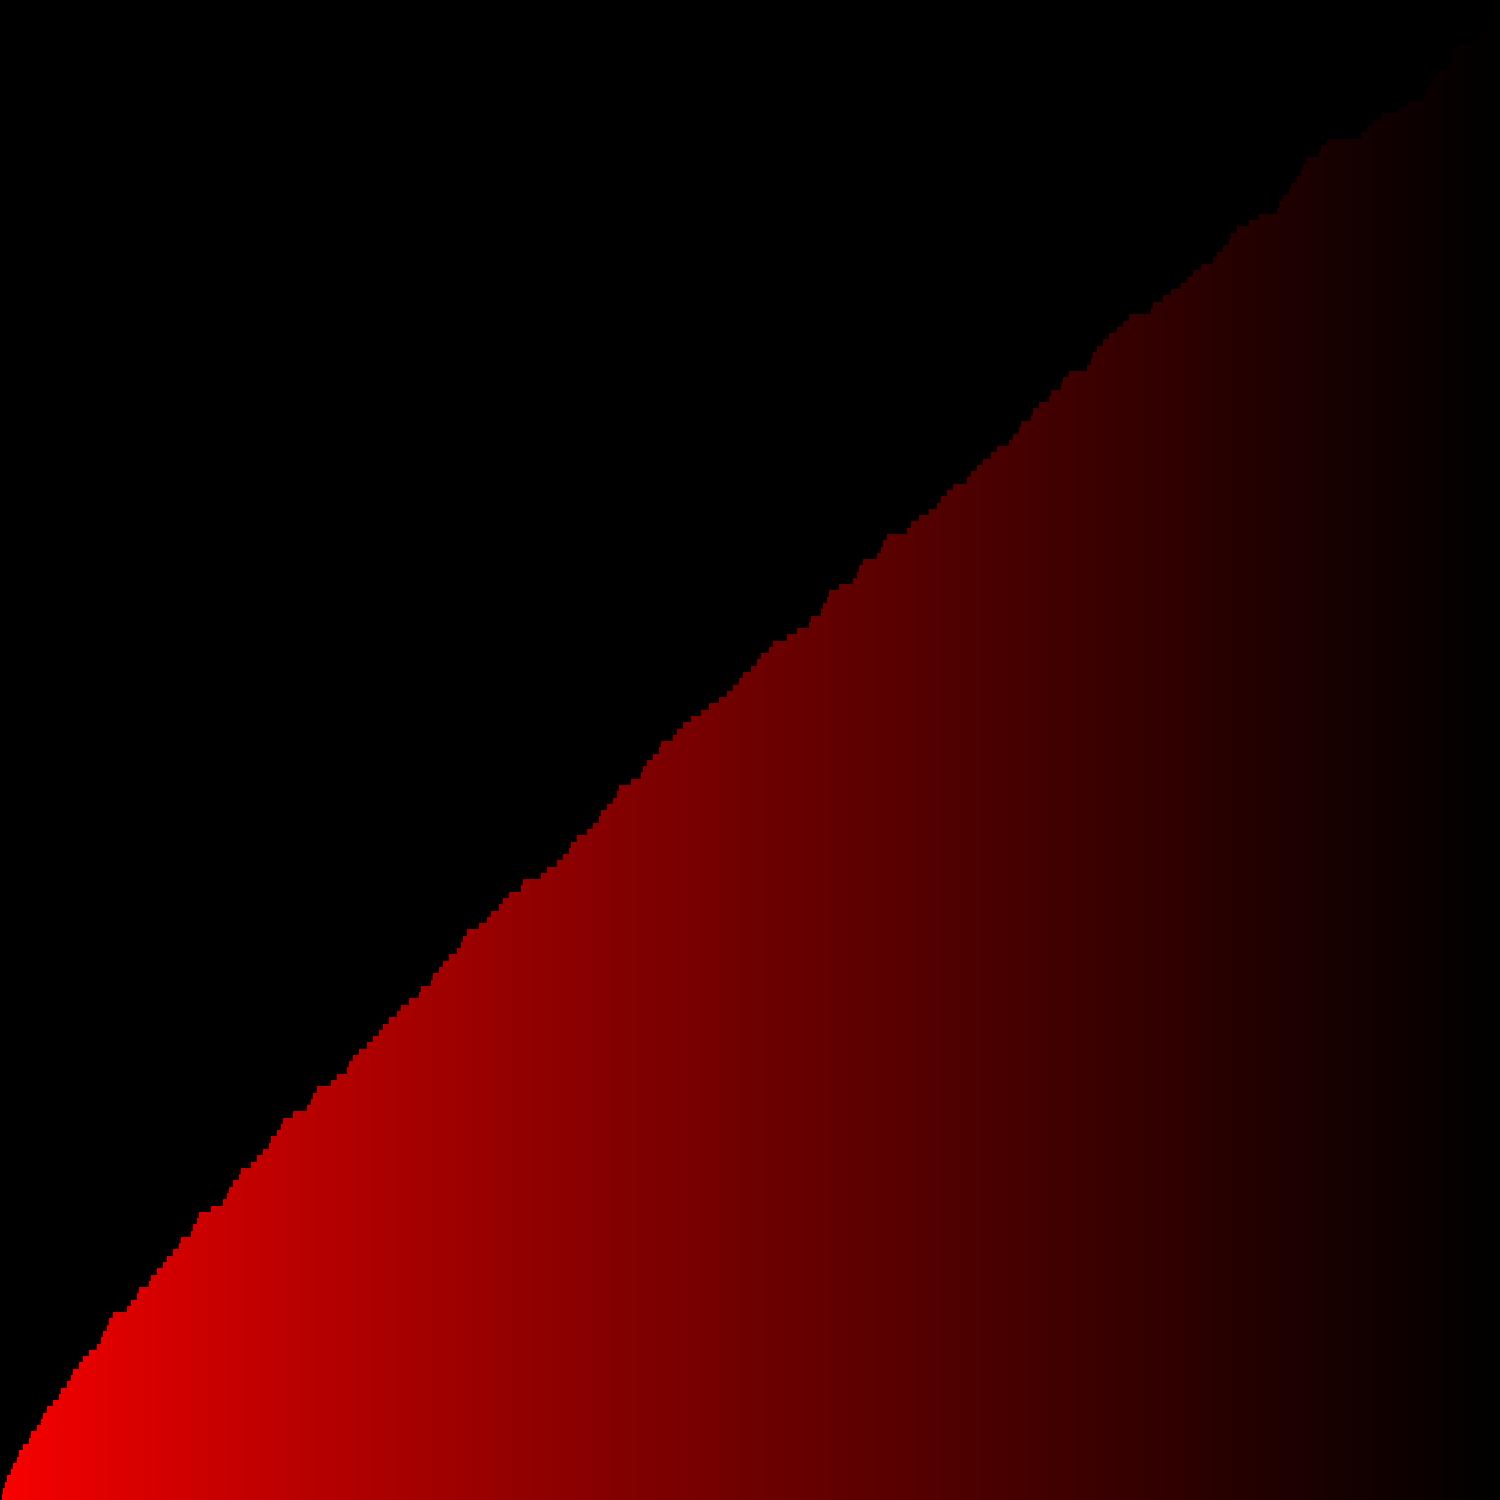

In [ ]:
img = Image.fromarray(pixels.astype(np.uint8))
img = img.rotate(90)  #we rotate the image because the x and y values in PIL are a little odd
display(img)

For a more accurate image, instead of using the ratios we created, we can use the raw values.

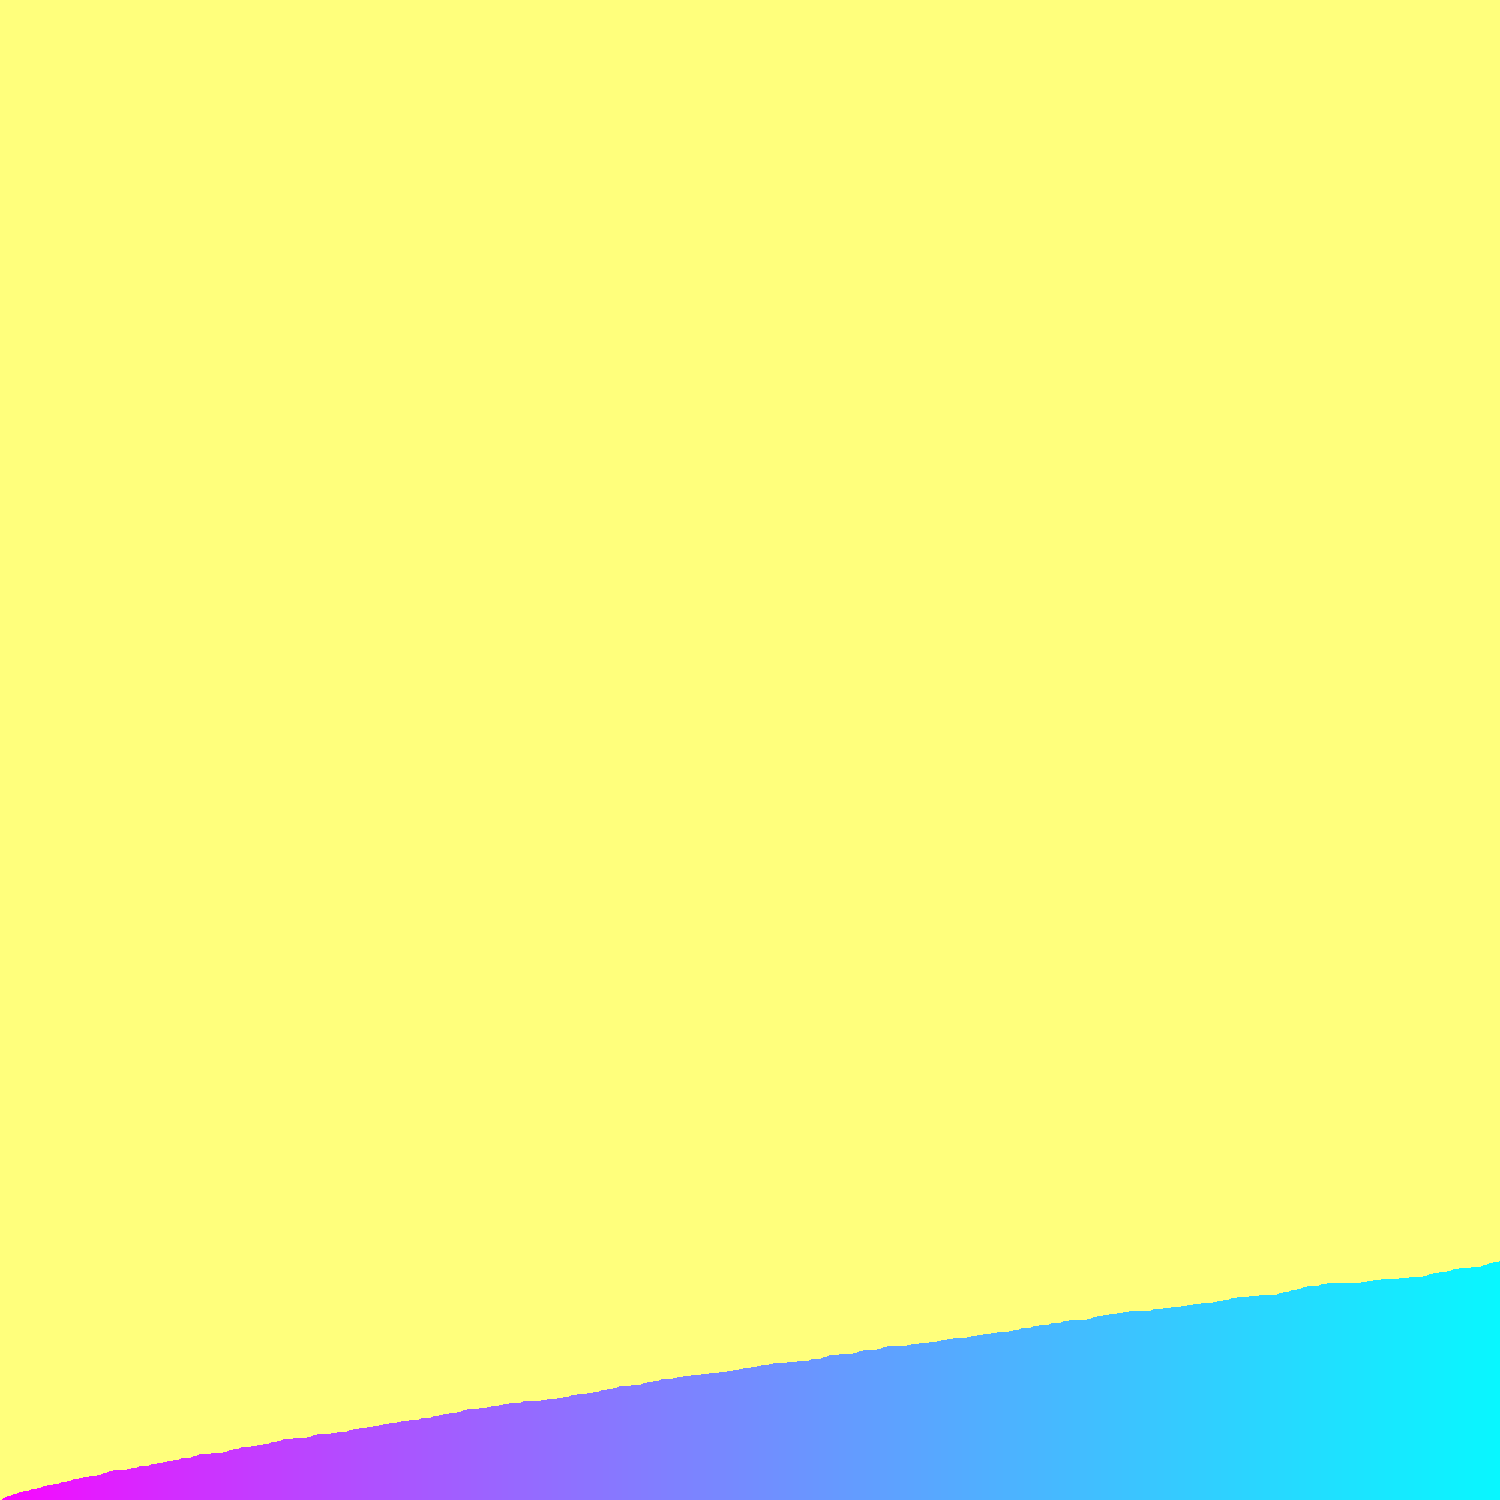

In [ ]:
accuratelogint = Log_int_array(1500)
accuratelogint = accuratelogint.astype(int)
primesacc = primesuptolist(1500)
primesacc = primesacc.astype(int)
pixels = np.zeros((1500,1500,3))  
pixels[:,:,0] = 255  
pixels[:,:,1] = 255
pixels[:,:,2] = 255
for x in range(1500): 
  pixels[x,:primesacc[x],0] = 255 - accuratelogint[x]  
  pixels[x,:primesacc[x],1] = accuratelogint[x]  
  pixels[x,primesacc[x]:,2] = 124 
img = Image.fromarray(pixels.astype(np.uint8))
img = img.rotate(90)  
display(img)

This graph is dimensionally accurate down the pixel, but leaves a lot of empty space

Alright now here is another graph we can create which can show the error calculation growing. We'll bring back the error calculation function to do this.

In [ ]:
errorto1500 = errorcalclist(1500)

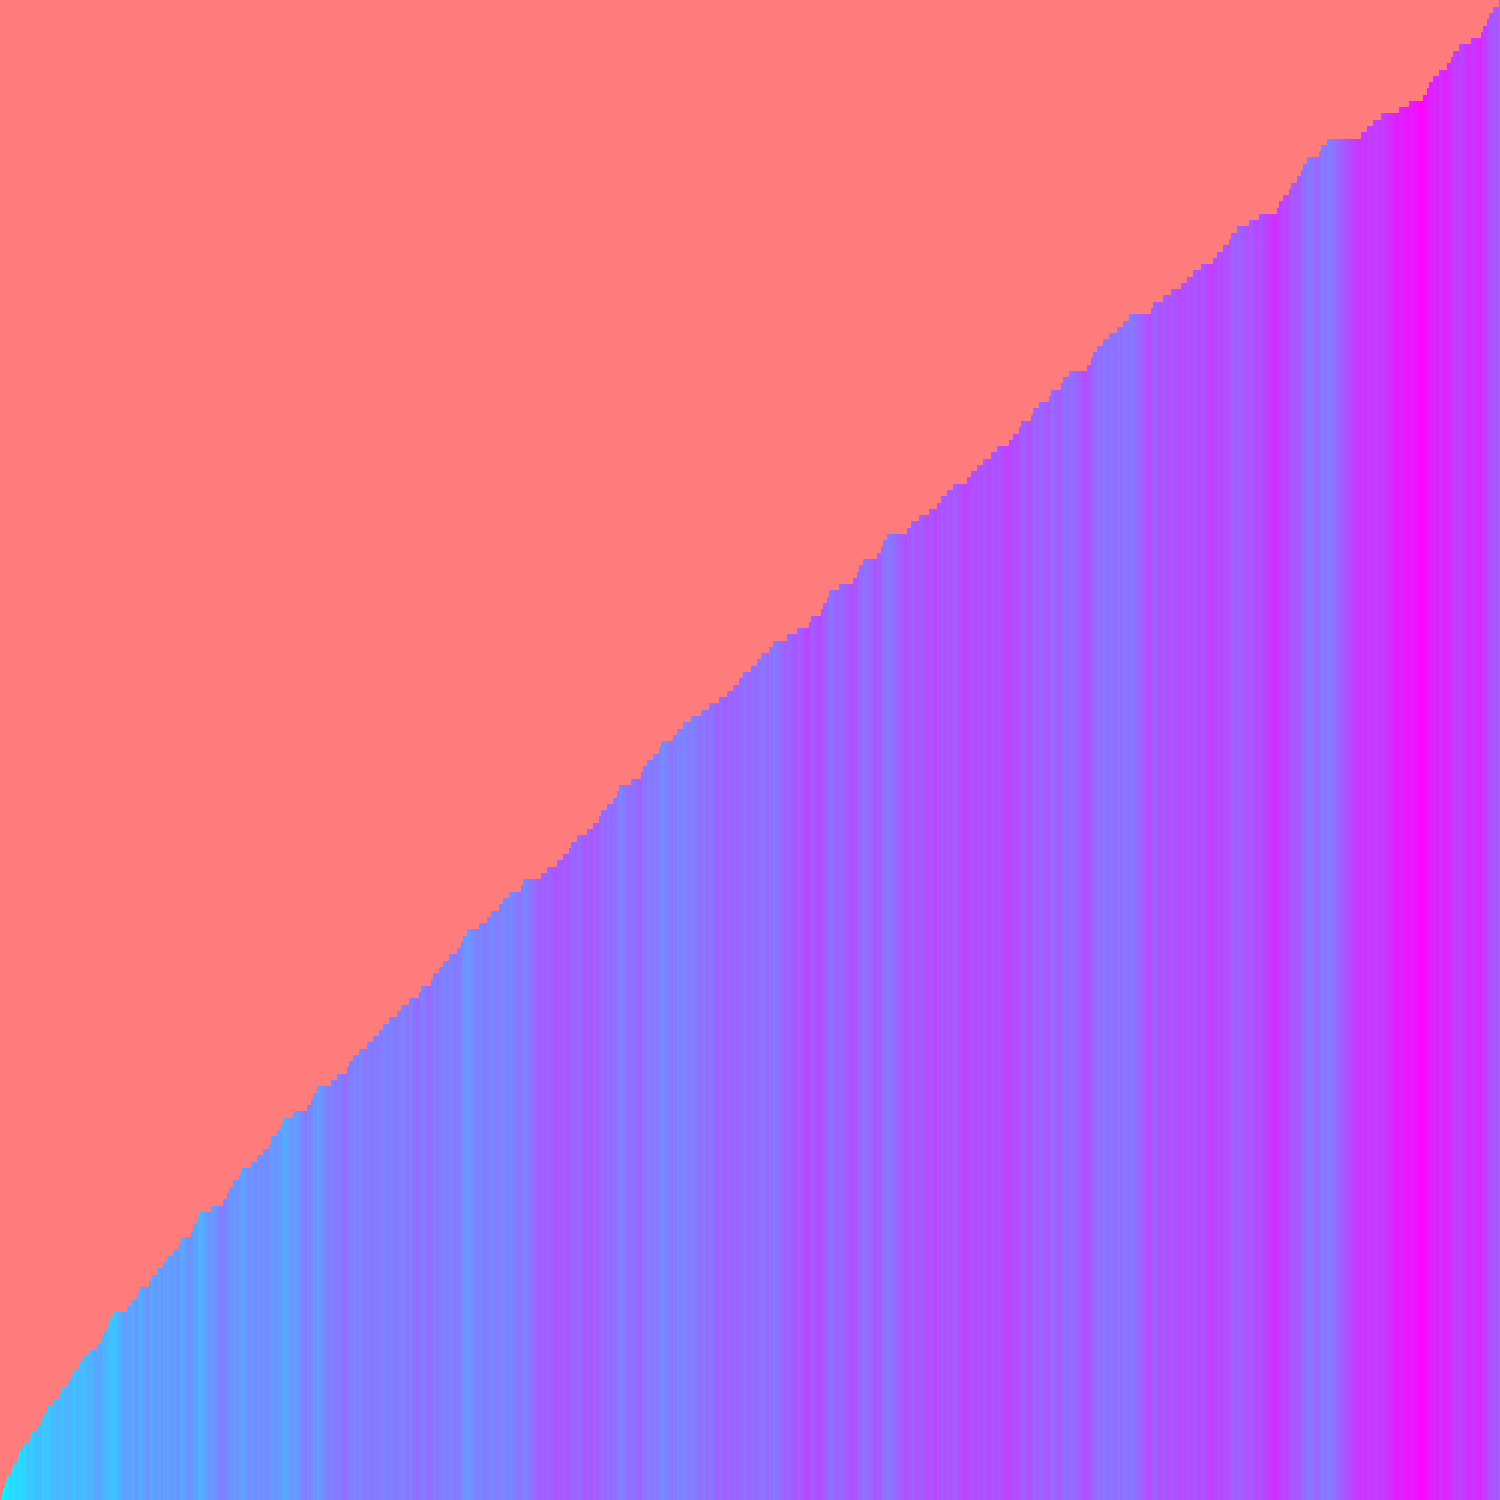

In [ ]:
erroradjust = errorcalclist(1500) * (255 / max(errorcalclist(1500)))
erroradjust = erroradjust.astype(int)
pixels = np.zeros((1500,1500,3)) 
pixels[:,:,0] = 255  
pixels[:,:,1] = 255
pixels[:,:,2] = 255
for x in range(1500): 
  pixels[x,:primeratio[x],0] = erroradjust[x]  #smaller error = more blue, larger error = more magenta
  pixels[x,:primeratio[x],1] = 255 - erroradjust[x]  
  pixels[x,primeratio[x]:,[1,2]] = 124
img = Image.fromarray(pixels.astype(np.uint8))
img = img.rotate(90)
display(img)

This graph is actually pretty interesting as the error calculation fluxuates back and forth. The magenta strips mean the error is larger for those X values and the bluer strips mean the error is smaller.

Another side note is that often after a noticable prime gap, the error grows and it usually takes a while for it to restabalise. This makes sense as the Logarithmic integral increases for each x value, never stagnating, while the prime number count will stagnate during each prime gap.